# Longitude Estimation Example

_Bennet Meyers, 9/1/20_

This notebook demonstrates the usage of the `ConfigurationEstimator` class to estimate longitude from field data. NIST provides data from a collection of fully intrumented and documented arrays installed at their Maryland campus. These arrays have known latitude, longitude, tilt, and azimth parameters. The data is publically available [here](https://doi.org/10.18434/M3S67G), and documentation of the systems is provided [here](http://dx.doi.org/10.6028/NIST.TN.1896). In preparation for this work, I downloaded the available data, which is provided in daily CSV files cover a time span of 4 years, seperated by system (ground, canopy, roof, and the two meterological stations). I extracted the power and irradiance columns from these 6937 individual CSV files, and combined them to generate a single table spaning four years. The resulting `pickle` file is about 1.1GB in size, and is available from [my personal OneDrive](https://office365stanford-my.sharepoint.com/:u:/g/personal/bennetm_stanford_edu/EZ6bR4CFT8BJoa6NHG8y6jEBnGwR5IKf7W0CTic-RCph-g?e=8VoEj3).

In [13]:
#Standard Imports
import pandas as pd
from glob import glob
from time import time
# Solar Data Tools imports
from solardatatools import DataHandler
# pv-system-profiler imports
import sys
sys.path.append('..')
from pvsystemprofiler.estimator import ConfigurationEstimator

Configuration information from the published documentation:

In [7]:
ground_system_configuration = {
    'longitude': -77.2141,
    'latitude': 39.1319,
    'tilt': 20,
    'azimuth': 0,
}

Load in 4-year data file, derived from NIST CSV files.

In [8]:
try:
    df = pd.read_pickle('NIST_all_power_and_irradiance.pkl')
except FileNotFoundError:
    print('Please download example data file to working directory')

Utilize standard `solar-data-tools` preprocessing pipeline.

total time: 6.23 seconds
form matrix: 2.80, fill matrix: 0.47, daily scores: 0.42, 
daily flags: 0.02, clear detect: 0.27, clipping check: 0.25, 
data scoring: 1.15, fix time shifts: 0.85,
Length:                4.00 years
Capacity estimate:     30.13 kW
Data sampling:         1.0 minute
Data quality score:    92.0%
Data clearness score:  15.5%
Inverter clipping:     False
Time shifts corrected: False
Time zone correction:  None


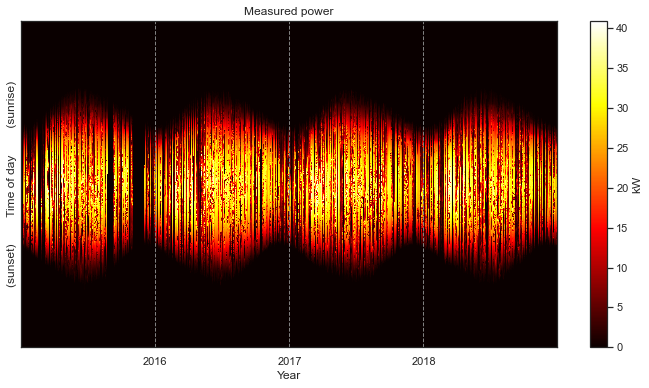

In [9]:
dh = DataHandler(df)
dh.run_pipeline(power_col=('ground', 'ShuntPDC_kW_Avg_4'))
dh.report()
dh.plot_heatmap(matrix='filled');

Initialize estimator class with the data handler instance and timezone information.

In [14]:
est = ConfigurationEstimator(dh, gmt_offset=-5)

Estimate longitude using Haghdadi's published method of taking the median of daily estimates:

In [19]:
est.estimate_longitude(estimator='calculated')
m1 = 'real lon:  {:.2f}\n'.format(ground_system_configuration['longitude'])
m1 += 'est  lon:  {:.2f}\n'.format(est.longitude)
m1 += 'error:       {:.2f}'.format(ground_system_configuration['longitude'] - est.longitude)
print(m1)

real lon:  -77.21
est  lon:  -77.35
error:       0.14


Estimate using cost-function minimization method, with a Huber cost.

In [22]:
est.estimate_longitude(estimator='fit_huber')
m1 = 'real lon:  {:.2f}\n'.format(ground_system_configuration['longitude'])
m1 += 'est  lon:  {:.2f}\n'.format(est.longitude)
m1 += 'error:       {:.2f}'.format(ground_system_configuration['longitude'] - est.longitude)
print(m1)

real lon:  -77.21
est  lon:  -77.36
error:       0.15
